In [304]:
%env CORENLP_HOME=./stanford-corenlp-4.5.4

env: CORENLP_HOME=./stanford-corenlp-4.5.4


In [1]:
import stanza
# Import client module
from stanza.server import CoreNLPClient

In [2]:
import pandas as pd
import numpy as np
import re
import nltk
import nltk
import matplotlib.pyplot as plt
import random
from nltk.corpus import stopwords

In [3]:
np.version.version

'1.23.5'

In [4]:
import tensorflow as tf

2023-05-25 20:37:58.375871: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [5]:
from keras.preprocessing.text import one_hot, Tokenizer
from keras.models import Sequential
from keras.layers.core import Activation, Dropout, Dense
from keras.layers import Flatten, GlobalMaxPooling1D, Embedding, Conv1D, LSTM, MaxPooling1D
from sklearn.model_selection import train_test_split

In [6]:
from keras_preprocessing.sequence import pad_sequences

## Loading dataset

In [183]:
df = pd.read_csv('./data/women_dresses_reviews_dataset.csv')

print(df.head())

df = df[['review_text', 'rating']]

print(df.shape)

   s.no  age   division_name department_name class_name  clothing_id  \
0     0   40         General         Bottoms      Jeans         1028   
1     1   62  General Petite            Tops    Blouses          850   
2     2   47  General Petite         Bottoms     Skirts          993   
3     3   45  General Petite         Bottoms      Pants         1068   
4     4   37       Initmates        Intimate       Swim           24   

                    title                                        review_text  \
0    Amazing fit and wash  Like other reviewers i was hesitant to spend t...   
1      Lovely and unique!  As is true of a bunch of the fall clothing pho...   
2                     Meh  I so wanted this skirt to work, love the desig...   
3                     Wow  Love love this! i was hesitant to buy this at ...   
4  Great for bigger busts  I absolutely love the retro look of this swims...   

   alike_feedback_count  rating  recommend_index   
0                     0       5   

In [184]:
df.head()

,review_text,rating
0,Like other reviewers i was hesitant to spend t...,5
1,As is true of a bunch of the fall clothing pho...,5
2,"I so wanted this skirt to work, love the desig...",1
3,Love love this! i was hesitant to buy this at ...,5
4,I absolutely love the retro look of this swims...,5


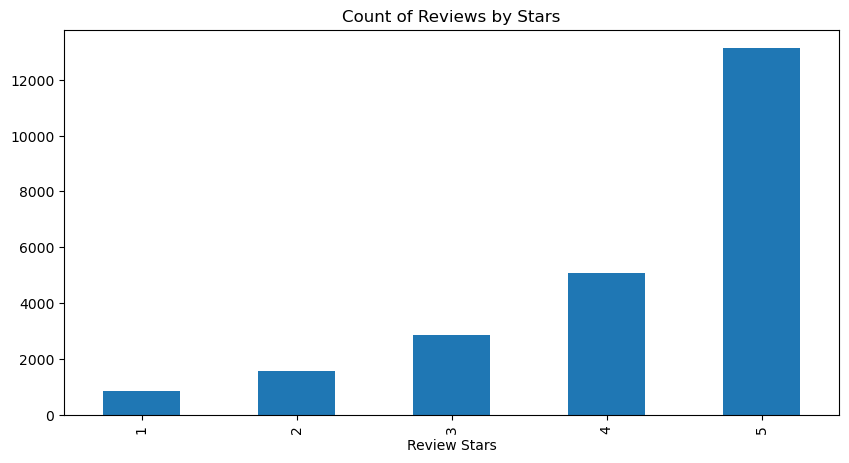

In [185]:
ax = df['rating'].value_counts().sort_index().plot(kind='bar', title='Count of Reviews by Stars', figsize=(10, 5))
ax.set_xlabel('Review Stars')
plt.show()

In [186]:
example = df['review_text'][100]

print(example)

I tried this on in my usual size and it was tight through the chest because of the lining. i would have preferred to wear a cami beneath and then it may have worked. the color and pattern are gorgeous, the fabric feels a bit weird, kind of dry and rough? would have liked to see this in a longer length, and more tapered. it is an absolute pregnant top. so sad its so pretty!


## Data manipulation

In [187]:
# Remove reviews with nan in review_text column
df = df.dropna(subset=['review_text'])

print(df.shape)

# 0 -- negative
# 1 -- positive
# 2 -- neutral
df['rating'] = df['rating'].replace({1.0: 'negative', 2.0: 'negative'})
df['rating'] = df['rating'].replace(3.0, 'negative')
df['rating'] = df['rating'].replace({5.0: 'positive', 4.0: 'positive'})
# df['rating'] = df['rating'].replace({1.0: 1, 2.0: 2})
# df['rating'] = df['rating'].replace(3.0, 3)
# df['rating'] = df['rating'].replace({5.0: 5, 4.0: 4})

(22641, 2)


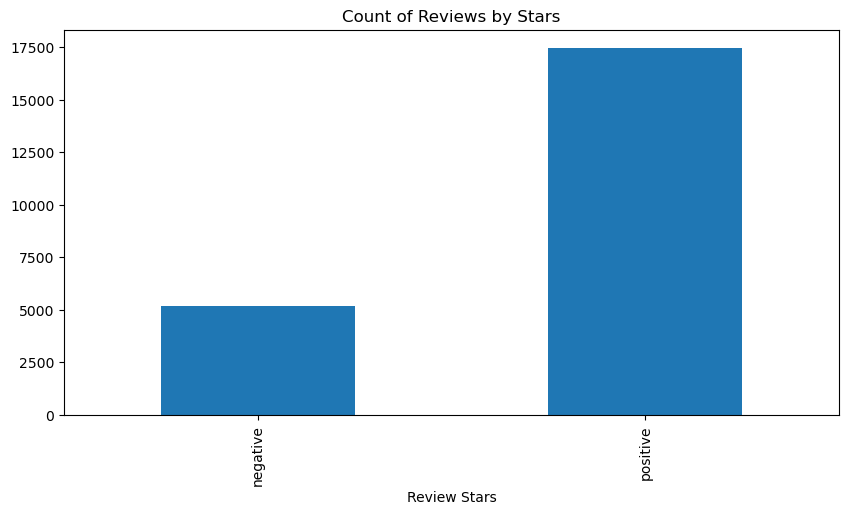

In [188]:
ax = df['rating'].value_counts().sort_index().plot(kind='bar', title='Count of Reviews by Stars', figsize=(10, 5))
ax.set_xlabel('Review Stars')
plt.show()

In [189]:
df.head()

,review_text,rating
0,Like other reviewers i was hesitant to spend t...,positive
1,As is true of a bunch of the fall clothing pho...,positive
2,"I so wanted this skirt to work, love the desig...",negative
3,Love love this! i was hesitant to buy this at ...,positive
4,I absolutely love the retro look of this swims...,positive


## Data preprocessing

In [190]:
before_preprocessing_example = df['review_text'][300]

print(before_preprocessing_example)

I ordered these leggings and loved them, for about an hour- at which point the belt loop ripped off of the pant, leaving a hole. i called customer service and they sent me a 2nd pair. same thing happened. i never even pulled on the belt loop. they are just so flimsy. it's a shame bc they are cool looking.


In [191]:
# download the stopwords from NLTK
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/bohdan.mykhayliv/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [192]:
import re                                  # library for regular expression operations
import string                              # for string operations

from nltk.corpus import stopwords          # module for stop words that come with NLTK
from nltk.stem import PorterStemmer        # module for stemming
from nltk.tokenize import TweetTokenizer   # module for tokenizing strings
from nltk.stem import WordNetLemmatizer

In [193]:
nltk.download('omw-1.4')

[nltk_data] Downloading package omw-1.4 to
[nltk_data]     /Users/bohdan.mykhayliv/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

In [194]:
def preprocess_text(initial_text):
  try:
    text = re.sub(r'^RT[\s]+', '', initial_text) 
    text = re.sub(r'https?:\/\/.*[\r\n]*', '', text)
    text = re.sub(r'#', '', text)
    tokenizer = TweetTokenizer(preserve_case=False, strip_handles=True, reduce_len=True)
    text_tokens = tokenizer.tokenize(text)
    stopwords_english = stopwords.words('english')
    text_clean = []

    for word in text_tokens:
      # Remove stopwords and punctuation
      if (word not in stopwords_english and word not in string.punctuation):
          text_clean.append(word)

    lemmatizer = WordNetLemmatizer()
    text_lem = [] 

    for word in text_clean:
        try:
          word = word.lower()
        except:
          continue

        lem_word = lemmatizer.lemmatize(word)  # lemmatizing word
        text_lem.append(lem_word) 

    return ' '.join(text_lem)
  except:
    return initial_text


In [195]:
print(preprocess_text(before_preprocessing_example))

ordered legging loved hour point belt loop ripped pant leaving hole called customer service sent 2nd pair thing happened never even pulled belt loop flimsy shame bc cool looking


In [196]:
# Preprocess all text in dataframe
df['processed_review_text'] = df['review_text'].apply(preprocess_text)

In [197]:
df.head()

,review_text,rating,processed_review_text
0,Like other reviewers i was hesitant to spend t...,positive,like reviewer hesitant spend much pair jean ho...
1,As is true of a bunch of the fall clothing pho...,positive,true bunch fall clothing photo color totally w...
2,"I so wanted this skirt to work, love the desig...",negative,wanted skirt work love design way way long ......
3,Love love this! i was hesitant to buy this at ...,positive,love love hesitant buy first review made seem ...
4,I absolutely love the retro look of this swims...,positive,absolutely love retro look swimsuit first saw ...


In [198]:
X = list(df['processed_review_text'])

In [199]:
X[1]

'true bunch fall clothing photo color totally washed model image shame embroidery bright vivid totally unique bib area actually soft corduroy think nice transition fall winter term fit feel like maybe geared towards slender build slim cut found really flattering since sometimes swim tunic 5 7 128 small'

In [200]:
y = df['rating']

# 0 -- negative
# 1 -- positive
# 2 -- neutral
y = y.replace('negative', 0)
y = y.replace('neutral', 2)
y = y.replace('positive', 1)

y = np.array(list(y))


In [201]:
y

array([1, 1, 0, ..., 1, 1, 1])

In [202]:
# Split data on train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Preparing embedding layer

In [203]:
word_tokenizer = Tokenizer()
# tokenizes the text data and creates a dictionary of word index mappings, where each word is assigned a unique integer ID.
# This dictionary can then be used to convert a text sample into a sequence of integers, which can be fed into a deep learning model.
word_tokenizer.fit_on_texts(X_train)

# After fit_on_texts is called, the texts_to_sequences function can be used to convert each text sample into
# a sequence of corresponding integers based on the dictionary created by fit_on_texts.
# Transforms each text in texts to a sequence of integers.
X_train = word_tokenizer.texts_to_sequences(X_train)
X_test = word_tokenizer.texts_to_sequences(X_test)

In [204]:
import json

In [205]:
tokenizer_json = word_tokenizer.to_json()

with open('./preparing/b3_tokenizer.json', 'w', encoding='utf-8') as f:
    f.write(json.dumps(tokenizer_json, ensure_ascii=False))

In [206]:
# Adding 1 to store dimensions for words for which no pretrained word embeddings exist
vocab_length = len(word_tokenizer.word_index) + 1

vocab_length

11835

In [207]:
maxlen = 100

X_train = pad_sequences(X_train, padding='post', maxlen=maxlen)
X_test = pad_sequences(X_test, padding='post', maxlen=maxlen)

In [208]:
from numpy import asarray
from numpy import zeros

embeddings_dictionary = dict()
glove_file = open('./preparing/glove.6B.100d.txt', encoding="utf8")

for line in glove_file:
    records = line.split()
    word = records[0]
    vector_dimensions = asarray(records[1:], dtype='float32')
    embeddings_dictionary [word] = vector_dimensions
glove_file.close()

In [209]:
# Create Embedding Matrix having 100 columns 
# Containing 100-dimensional GloVe word embeddings for all words in our corpus.

embedding_matrix = zeros((vocab_length, 100))
for word, index in word_tokenizer.word_index.items():
    embedding_vector = embeddings_dictionary.get(word)
    if embedding_vector is not None:
        embedding_matrix[index] = embedding_vector

In [210]:
embedding_matrix.shape

(11835, 100)

# Model Training with:

## Simple Neural Network

In [94]:
snn_model = Sequential()
embedding_layer = Embedding(vocab_length, 100, weights=[embedding_matrix], input_length=maxlen , trainable=False)

snn_model.add(embedding_layer)

snn_model.add(Flatten())
snn_model.add(Dense(1, activation='sigmoid'))

In [95]:
snn_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['acc'])

print(snn_model.summary())

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 100, 100)          1183500   
                                                                 
 flatten_1 (Flatten)         (None, 10000)             0         
                                                                 
 dense_1 (Dense)             (None, 1)                 10001     
                                                                 
Total params: 1,193,501
Trainable params: 10,001
Non-trainable params: 1,183,500
_________________________________________________________________
None


In [96]:
snn_model_history = snn_model.fit(X_train, y_train, batch_size=128, epochs=6, verbose=1, validation_split=0.2)

Epoch 1/6
114/114 [==============================] - 1s 5ms/step - loss: 0.5072 - acc: 0.7667 - val_loss: 0.4662 - val_acc: 0.7844
Epoch 2/6
114/114 [==============================] - 0s 4ms/step - loss: 0.4251 - acc: 0.8031 - val_loss: 0.4486 - val_acc: 0.7900
Epoch 3/6
114/114 [==============================] - 0s 3ms/step - loss: 0.3882 - acc: 0.8232 - val_loss: 0.4382 - val_acc: 0.7933
Epoch 4/6
114/114 [==============================] - 0s 3ms/step - loss: 0.3651 - acc: 0.8389 - val_loss: 0.4358 - val_acc: 0.7999
Epoch 5/6
114/114 [==============================] - 0s 3ms/step - loss: 0.3466 - acc: 0.8476 - val_loss: 0.4364 - val_acc: 0.8015
Epoch 6/6
114/114 [==============================] - 0s 3ms/step - loss: 0.3343 - acc: 0.8538 - val_loss: 0.4395 - val_acc: 0.8043


In [97]:
score = snn_model.evaluate(X_test, y_test, verbose=1)

142/142 [==============================] - 0s 1ms/step - loss: 0.4359 - acc: 0.8050


In [98]:
print("Test Score:", score[0])
print("Test Accuracy:", score[1])

Test Score: 0.43586039543151855
Test Accuracy: 0.8050342202186584


## Convolutional Neural Network

In [175]:
from keras.layers import Conv1D

In [214]:
cnn_model = Sequential()

embedding_layer = Embedding(vocab_length, 100, weights=[embedding_matrix], input_length=maxlen , trainable=False)
cnn_model.add(embedding_layer)

cnn_model.add(Conv1D(filters=128, kernel_size=5, activation='relu'))

cnn_model.add(GlobalMaxPooling1D())

cnn_model.add(Dense(1, activation='sigmoid'))

In [215]:
cnn_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['acc'])
print(cnn_model.summary())

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_9 (Embedding)     (None, 100, 100)          1183500   
                                                                 
 conv1d_8 (Conv1D)           (None, 96, 128)           64128     
                                                                 
 global_max_pooling1d_5 (Glo  (None, 128)              0         
 balMaxPooling1D)                                                
                                                                 
 dense_13 (Dense)            (None, 1)                 129       
                                                                 
Total params: 1,247,757
Trainable params: 64,257
Non-trainable params: 1,183,500
_________________________________________________________________
None


In [216]:
cnn_model_history = cnn_model.fit(X_train, y_train, batch_size=128, epochs=10, verbose=1, validation_split=0.2)

Epoch 1/10
114/114 [==============================] - 4s 27ms/step - loss: 0.4974 - acc: 0.7793 - val_loss: 0.4003 - val_acc: 0.8126
Epoch 2/10
114/114 [==============================] - 3s 24ms/step - loss: 0.3483 - acc: 0.8507 - val_loss: 0.3677 - val_acc: 0.8253
Epoch 3/10
114/114 [==============================] - 3s 24ms/step - loss: 0.2933 - acc: 0.8803 - val_loss: 0.3409 - val_acc: 0.8482
Epoch 4/10
114/114 [==============================] - 3s 24ms/step - loss: 0.2549 - acc: 0.9000 - val_loss: 0.3348 - val_acc: 0.8507
Epoch 5/10
114/114 [==============================] - 3s 23ms/step - loss: 0.2168 - acc: 0.9215 - val_loss: 0.3692 - val_acc: 0.8385
Epoch 6/10
114/114 [==============================] - 3s 24ms/step - loss: 0.1834 - acc: 0.9384 - val_loss: 0.3266 - val_acc: 0.8562
Epoch 7/10
114/114 [==============================] - 3s 24ms/step - loss: 0.1512 - acc: 0.9554 - val_loss: 0.3370 - val_acc: 0.8540
Epoch 8/10
114/114 [==============================] - 3s 23ms/step - 

In [217]:
cnn_model_score = cnn_model.evaluate(X_test, y_test, verbose=1)

142/142 [==============================] - 1s 4ms/step - loss: 0.3486 - acc: 0.8616


In [218]:
print("Test Score:", cnn_model_score[0])
print("Test Accuracy:", cnn_model_score[1])

Test Score: 0.34857526421546936
Test Accuracy: 0.8615588545799255


# Recurrent Neural Network (LSTM)

In [181]:
lstm_model = Sequential()
embedding_layer = Embedding(vocab_length, 100, weights=[embedding_matrix], input_length=maxlen , trainable=False)

lstm_model.add(embedding_layer)
lstm_model.add(LSTM(128))

lstm_model.add(Dense(1, activation='sigmoid'))

2023-05-25 21:00:11.673865: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2023-05-25 21:00:11.675463: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2023-05-25 21:00:11.676774: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

In [182]:
lstm_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['acc'])
print(lstm_model.summary())

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_7 (Embedding)     (None, 100, 100)          1183500   
                                                                 
 lstm (LSTM)                 (None, 128)               117248    
                                                                 
 dense_11 (Dense)            (None, 1)                 129       
                                                                 
Total params: 1,300,877
Trainable params: 117,377
Non-trainable params: 1,183,500
_________________________________________________________________
None


In [48]:
lstm_model_history = lstm_model.fit(X_train, y_train, batch_size=128, epochs=6, verbose=1, validation_split=0.2)

Epoch 1/6


2023-05-25 00:31:01.817826: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2023-05-25 00:31:01.819220: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2023-05-25 00:31:01.820741: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

114/114 [==============================] - ETA: 0s - loss: 0.5497 - acc: 0.7707

2023-05-25 00:31:35.914947: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2023-05-25 00:31:35.917547: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2023-05-25 00:31:35.919770: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

114/114 [==============================] - 38s 320ms/step - loss: 0.5497 - acc: 0.7707 - val_loss: 0.5449 - val_acc: 0.7662
Epoch 2/6
114/114 [==============================] - 46s 403ms/step - loss: 0.5379 - acc: 0.7707 - val_loss: 0.5465 - val_acc: 0.7662
Epoch 3/6
114/114 [==============================] - 46s 407ms/step - loss: 0.5362 - acc: 0.7713 - val_loss: 0.5413 - val_acc: 0.7662
Epoch 4/6
114/114 [==============================] - 41s 362ms/step - loss: 0.5289 - acc: 0.7713 - val_loss: 0.4962 - val_acc: 0.7659
Epoch 5/6
114/114 [==============================] - 48s 418ms/step - loss: 0.5013 - acc: 0.7716 - val_loss: 0.4599 - val_acc: 0.7657
Epoch 6/6
114/114 [==============================] - 46s 409ms/step - loss: 0.4683 - acc: 0.7800 - val_loss: 0.4503 - val_acc: 0.7720


In [49]:
lstm_model_score = lstm_model.evaluate(X_test, y_test, verbose=1)

142/142 [==============================] - 28s 196ms/step - loss: 0.4561 - acc: 0.7662


In [50]:
print("Test Score:", lstm_model_score[0])
print("Test Accuracy:", lstm_model_score[1])

Test Score: 0.45611825585365295
Test Accuracy: 0.7661735415458679


In [51]:
lstm_model.save(f"./models/c1_lstm_model_acc_{round(lstm_model_score[1], 3)}.h5", save_format='h5')

## Making Predictions

In [52]:
pwd

'/Users/bohdan.mykhayliv/Documents/ucu/year3_semester2/ml/project/programming'

In [25]:
from keras.models import load_model

model_path ='./models/c1_cnn_model_acc_0.868.h5'
pretrained_model = load_model(model_path)

pretrained_model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 100, 100)          1346000   
                                                                 
 conv1d (Conv1D)             (None, 96, 128)           64128     
                                                                 
 global_max_pooling1d (Globa  (None, 128)              0         
 lMaxPooling1D)                                                  
                                                                 
 dense_1 (Dense)             (None, 1)                 129       
                                                                 
Total params: 1,410,257
Trainable params: 64,257
Non-trainable params: 1,346,000
_________________________________________________________________


In [26]:
positive_review = 'I absolutely love this dress! The fabric is incredibly soft and comfortable, and the fit is perfect for my body type. The color is vibrant and has not faded at all after multiple washes. The design is unique and eye-catching, and I have received numerous compliments every time I wear it. The attention to detail is also impressive, with intricate stitching and a flattering silhouette. Overall, I would highly recommend this dress to anyone looking for a high-quality, stylish addition to their wardrobe.'
neutral_review = 'I recently purchased this dress and thought it was decent. The fabric was of average quality and the fit was mostly true to size, although I did have to make a few minor alterations to get it to fit just right. The color was nice, but not quite as vibrant as I was expecting. The design was simple and understated, which could be either a positive or negative depending on personal style preferences. Overall, I would say this dress is a solid option for a more casual or everyday look.'
negative_review = ' was really disappointed with this dress. The fabric felt cheap and scratchy against my skin, and the fit was all wrong. The dress was advertised as being true to size, but it was way too tight in some areas and too loose in others. The color also looked different in person than it did online, and I was not a fan of how it looked on me. Additionally, the seams were poorly done and started coming apart after just a few wears. Overall, I would not recommend this dress to anyone.'

In [27]:
preprocessed_positive_review = preprocess_text(positive_review)
preprocessed_neutral_review = preprocess_text(neutral_review)
preprocessed_negative_review = preprocess_text(negative_review)

In [28]:
from keras_preprocessing.text import tokenizer_from_json

In [29]:
with open('./preparing/b3_tokenizer.json') as f:
    data = json.load(f)
    loaded_tokenizer = tokenizer_from_json(data)

In [30]:
reviews_list = [preprocessed_positive_review, preprocessed_neutral_review, preprocessed_negative_review]

reviews_tokenized = loaded_tokenizer.texts_to_sequences(reviews_list)

In [31]:
reviews_tokenized

[[2,
  257,
  21,
  7,
  18,
  1,
  45,
  6,
  664,
  60,
  3,
  70,
  3,
  1,
  27,
  6,
  54,
  12,
  17,
  175,
  462,
  1,
  47,
  6,
  511,
  3,
  89,
  19,
  1344,
  44,
  74,
  201,
  1132,
  1154,
  1,
  143,
  6,
  279,
  3,
  659,
  1715,
  3,
  2,
  24,
  240,
  2120,
  214,
  320,
  188,
  2,
  32,
  5,
  1,
  1110,
  8,
  256,
  6,
  87,
  3757,
  14,
  1862,
  797,
  3,
  4,
  58,
  931,
  255,
  2,
  41,
  437,
  210,
  7,
  18,
  8,
  849,
  183,
  12,
  4,
  179,
  96,
  519,
  674,
  8,
  565,
  480],
 [2,
  943,
  140,
  7,
  18,
  3,
  195,
  5,
  15,
  1755,
  1,
  45,
  15,
  13,
  900,
  96,
  3,
  1,
  27,
  15,
  1105,
  131,
  8,
  22,
  436,
  2,
  133,
  24,
  8,
  189,
  4,
  378,
  2015,
  2247,
  8,
  115,
  5,
  8,
  27,
  39,
  126,
  1,
  47,
  15,
  69,
  10,
  19,
  262,
  31,
  511,
  31,
  2,
  15,
  785,
  1,
  143,
  15,
  561,
  3,
  2052,
  82,
  119,
  29,
  438,
  4,
  1487,
  37,
  1184,
  702,
  11,
  1763,
  132,
  255,
  2,
  41,
  277,
 

In [32]:
reviews_padded = pad_sequences(reviews_tokenized, padding='post', maxlen=100)

In [33]:
reviews_padded

array([[   2,  257,   21,    7,   18,    1,   45,    6,  664,   60,    3,
          70,    3,    1,   27,    6,   54,   12,   17,  175,  462,    1,
          47,    6,  511,    3,   89,   19, 1344,   44,   74,  201, 1132,
        1154,    1,  143,    6,  279,    3,  659, 1715,    3,    2,   24,
         240, 2120,  214,  320,  188,    2,   32,    5,    1, 1110,    8,
         256,    6,   87, 3757,   14, 1862,  797,    3,    4,   58,  931,
         255,    2,   41,  437,  210,    7,   18,    8,  849,  183,   12,
           4,  179,   96,  519,  674,    8,  565,  480,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0],
       [   2,  943,  140,    7,   18,    3,  195,    5,   15, 1755,    1,
          45,   15,   13,  900,   96,    3,    1,   27,   15, 1105,  131,
           8,   22,  436,    2,  133,   24,    8,  189,    4,  378, 2015,
        2247,    8,  115,    5,    8,   27,   39,  126,    1,   47,   15,
          69,   10,   1

In [34]:
# Passing tokenised instance to the LSTM model for predictions
reviews_sentiments = pretrained_model.predict(reviews_padded)

reviews_sentiments

1/1 [==============================] - 0s 66ms/step


array([[0.9418644 ],
       [0.18463959],
       [0.00126234]], dtype=float32)

# Extracting Aspects:

In [292]:
def get_word(ann, sentenceIndex, tokenIndex):
    return ann.sentence[sentenceIndex].token[tokenIndex].word

In [293]:
def join_compounds(ann):
    compound_main_words = dict()
    num_of_sentences = len(ann.sentence)
    for sentenceIndex in range(num_of_sentences):
        compound_ties = dict()
        compound_headIndexes = []
        sentence = ann.sentence[sentenceIndex]
        for dependencie in sentence.basicDependencies.edge:
            if dependencie.dep == 'compound':
                ### if we already had that gov word
                if dependencie.source in compound_ties:
                    if (abs(dependencie.source - dependencie.target) < abs(dependencie.source - compound_ties[dependencie.source])):
                        compound_headIndexes.remove(compound_ties[dependencie.source])
                        compound_ties[dependencie.source] = dependencie.target
                        compound_headIndexes.append(dependencie.target)
                    continue
                # print(dependencie.source, dependencie.target)
                compound_ties[dependencie.source] = dependencie.target
                compound_headIndexes.append(dependencie.target)
                compound_headIndexes.append(dependencie.source)

        compound_headIndexes.sort()
        compound_chain = False
        # print(compound_ties)
        # print([(headIndex, get_word(ann, sentenceIndex, headIndex-1)) for headIndex in compound_headIndexes])
        while True:
            if len(compound_headIndexes) == 0:
                break
            if compound_chain == False:
                compound_headIndex = max(compound_headIndexes)
                main_compound_index = compound_headIndex
                compound_main_words[(sentenceIndex, main_compound_index)] = [get_word(ann, sentenceIndex, main_compound_index-1)]
                compound_headIndexes.remove(compound_headIndex)
                compound_chain = True
            else:
                if compound_headIndex in compound_ties:
                    compound_headIndex = compound_ties[compound_headIndex]
                    compound_headIndexes.remove(compound_headIndex)
                    compound_main_words[(sentenceIndex, main_compound_index)].append(get_word(ann, sentenceIndex, compound_headIndex-1))
                else:
                    compound_chain = False


    final_compounds = dict()
    for main_compound_key in compound_main_words:
        reversed_words = compound_main_words[main_compound_key]
        n = len(reversed_words)
        words = [0]*n
        for i in range(n):
            words[i] = reversed_words[n-i-1]
        final_compounds[main_compound_key] = "-".join(words)

    return final_compounds

In [294]:
def join_xcomp_advmod(ann):
    advmods = dict()
    xcomps = dict()
    num_of_sentences = len(ann.sentence)
    for sentenceIndex in range(num_of_sentences):
        sentence = ann.sentence[sentenceIndex]
        for dependencie in sentence.basicDependencies.edge:
            if dependencie.dep == 'advmod':
                if not (get_word(ann, sentenceIndex, dependencie.target-1) == "WRB"):
                    advmods[(sentenceIndex, dependencie.source)] = (sentenceIndex, dependencie.target)
            if dependencie.dep == 'xcomp':
                xcomps[(sentenceIndex, dependencie.source)] = (sentenceIndex, dependencie.target)

    xcomps_advmods = dict()
    for gov in advmods:
        dependent = advmods[gov]
        gov_word = get_word(ann, gov[0], gov[1]-1)
        dep_word = get_word(ann, dependent[0], dependent[1]-1)
        if dependent[1] > gov[1]:
            xcomps_advmods[gov] = f"{gov_word}-{dep_word}"
        else:
            xcomps_advmods[gov] = f"{dep_word}-{gov_word}"

    for gov in xcomps:
        dependent = xcomps[gov]
        gov_word = get_word(ann, gov[0], gov[1]-1)
        dependent_word = get_word(ann, dependent[0], dependent[1]-1)
        if dependent in xcomps_advmods:
            dependent_word = xcomps_advmods[dependent]

        xcomps_advmods[gov] = f"{gov_word}-{dependent_word}"

    return xcomps_advmods

In [295]:
def replace_with_corefs(ann, opinion_pairs, corefs_pivot):
    n = len(opinion_pairs)
    for i in range(n):
        opinion_pair = opinion_pairs[i]
        dependencie_type = opinion_pair[0]
        new_governor = opinion_pair[1]
        new_dependent = opinion_pair[2]
        if opinion_pair[1][1] in corefs_pivot:
            new_governor_ind = corefs_pivot[opinion_pair[1][1]]
            new_governor = (ann.sentence[new_governor_ind[0]].token[new_governor_ind[1] - 1].word, new_governor_ind)

        if opinion_pair[2][1] in corefs_pivot:
            new_dependent_ind = corefs_pivot[opinion_pair[2][1]]
            new_dependent = (ann.sentence[new_dependent_ind[0]].token[new_dependent_ind[1] - 1].word, new_dependent_ind)

        opinion_pairs[i] = (dependencie_type,new_governor, new_dependent)

In [296]:
def replace_words_with_structure(opinion_pairs, structure_dict):
    n = len(opinion_pairs)
    for i in range(n):
        opinion_pair = opinion_pairs[i]
        dependencie_type = opinion_pair[0]
        new_governor = opinion_pair[1]
        new_dependent = opinion_pair[2]
        if opinion_pair[1][1] in structure_dict:
            new_governor_word = structure_dict[opinion_pair[1][1]]
            new_governor = (new_governor_word, opinion_pair[1][1])

        if opinion_pair[2][1] in structure_dict:
            new_dependent_word = structure_dict[opinion_pair[2][1]]
            new_dependent = (new_dependent_word, opinion_pair[2][1])

        opinion_pairs[i] = (dependencie_type ,new_governor, new_dependent)

In [297]:
def substract_opinion_pairs(ann, dependencies, unresolved_mentions):
    opinion_pairs = []
    for dependencie in dependencies:
        if ((dependencie[0] == 'nsubj') and (dependencie[2][1] not in unresolved_mentions) and (ann.sentence[dependencie[1][1][0]].token[dependencie[1][1][1]-1].sentiment != "Neutral")):
            opinion_pairs.append(dependencie)
        elif ((dependencie[0] == 'amod') and (ann.sentence[dependencie[1][1][0]].token[dependencie[2][1][1]-1].pos == "JJ")):
            opinion_pairs.append(dependencie)
        elif ((dependencie[0] == 'obj') and (ann.sentence[dependencie[1][1][0]].token[dependencie[1][1][1]-1].sentiment != "Neutral")):   ### ??????
            opinion_pairs.append(dependencie)
        else:
            continue
    return opinion_pairs

In [298]:
def extract_dependencies(ann):
    dependencies = []
    num_of_sentences = len(ann.sentence)
    for sentenceIndex in range(num_of_sentences):
        sentence = ann.sentence[sentenceIndex]
        for dependencie in sentence.basicDependencies.edge:
            governor = (sentenceIndex, dependencie.source)
            relation_type = dependencie.dep
            dependent = (sentenceIndex, dependencie.target)
            # One dependencie: ('obj', ('enjoyed', (0, 2)), ('resolution', (0, 5)))
            dependencies.append((relation_type, (sentence.token[governor[1]-1].word, governor), (sentence.token[dependent[1]-1].word, dependent)))
    return dependencies

In [305]:
def create_aspects_dict(opinion_pairs):
    aspects_dict = dict()    # {aspect: [sentiment_word1, ....]}
    for opinion_pair in opinion_pairs:
        aspect = opinion_pair[2]
        sentiment_word = opinion_pair[1]
        if (opinion_pair[0] == 'nsubj'):
            aspect = opinion_pair[2]
            sentiment_word = opinion_pair[1]
        elif (opinion_pair[0] == 'amod'):
            aspect = opinion_pair[1]
            sentiment_word = opinion_pair[2]
        elif (opinion_pair[0] == 'obj'):
            aspect = opinion_pair[2]
            sentiment_word = opinion_pair[1]
        else:
            pass

        if aspect in aspects_dict:
            aspects_dict[aspect].append(sentiment_word)
        else:
            aspects_dict[aspect] = [sentiment_word]

    return aspects_dict

In [306]:
def print_apects_dict(aspects_dict):
    for aspect in aspects_dict:
        print(aspect[0], ': ', [sentiment_word[0] for sentiment_word in aspects_dict[aspect]], sep='')

In [307]:
def parse_text(text):
    ann = None
    # Set up the client
    with CoreNLPClient(be_quite=False, annotators=['tokenize', 'ssplit', 'pos', 'lemma', 'ner', 'parse', 'coref'], timeout=30000, memory='16G', endpoint='http://localhost:5003') as client:        
        # Parse the text using the client
        ann = client.annotate(text)

        client.stop()
    return ann


In [308]:
def get_corefs(ann):
    corefs = {}
    unresolved_mentions = set()
    min_indexes = set()
    for coref in ann.corefChain:
        mentions = []
        min_sentenceIndex = float("inf")
        min_headIndex = float("inf")
        for mention in coref.mention:
            if mention.sentenceIndex == min_sentenceIndex:
                if mention.headIndex < min_headIndex:
                    min_headIndex = mention.headIndex
            if mention.sentenceIndex < min_sentenceIndex:
                min_sentenceIndex = mention.sentenceIndex
                min_headIndex = mention.headIndex

            mentions.append((mention.sentenceIndex, mention.headIndex + 1))
        min_indexes.add((min_sentenceIndex, min_headIndex + 1))
        if len(mentions) > 1:
            for mention in mentions:
                key = mention[0], mention[1]
                value = [m for m in mentions if m != mention]
                corefs[key] = value
        else:
            if len(mentions) == 1:
                ### add pronouns to unresolved
                if ann.sentence[mentions[0][0]].token[mentions[0][1]-1].pos == "PRP":
                    unresolved_mentions.add(mentions[0])

    corefs_pivot = {}
    for key in corefs:
        if key in min_indexes:
            replacable_words = corefs[key]
            ### add pronouns to unresolved
            if ann.sentence[key[0]].token[key[1]-1].pos == "PRP":
                unresolved_mentions.add(key)
                for replacable_word in replacable_words:
                    unresolved_mentions.add(replacable_word)
            ##############################
            for replacable_word in replacable_words:
                corefs_pivot[replacable_word] = key

    return corefs_pivot, unresolved_mentions

In [309]:
text = "I enjoyed the body fit, it is very good for such a cheap dress. Also, I liked the fabrik, because it feels so soft!"
ann = parse_text(text)

2023-05-25 01:07:13 INFO: Writing properties to tmp file: corenlp_server-f2a19d89e9214726.props
2023-05-25 01:07:13 INFO: Starting server with command: java -Xmx16G -cp ./stanford-corenlp-4.5.4/* edu.stanford.nlp.pipeline.StanfordCoreNLPServer -port 5003 -timeout 30000 -threads 5 -maxCharLength 100000 -quiet False -serverProperties corenlp_server-f2a19d89e9214726.props -annotators tokenize,ssplit,pos,lemma,ner,parse,coref -preload -outputFormat serialized
[main] INFO CoreNLP - --- StanfordCoreNLPServer#main() called ---
[main] INFO CoreNLP - Server default properties:
			(Note: unspecified annotator properties are English defaults)
			annotators = tokenize,ssplit,pos,lemma,ner,parse,coref
			inputFormat = text
			outputFormat = serialized
			prettyPrint = false
			threads = 5
[main] INFO CoreNLP - Threads: 5
[main] INFO edu.stanford.nlp.pipeline.StanfordCoreNLP - Adding annotator tokenize
[main] INFO edu.stanford.nlp.pipeline.StanfordCoreNLP - Adding annotator pos
[main] INFO edu.stanf

I enjoyed the body fit, it is very good for such a cheap dress. Also, I liked the fabrik, because it feels so soft!


[Thread-0] INFO CoreNLP - CoreNLP Server is shutting down.


In [310]:
compounds = join_compounds(ann)
xcomps_advmods = join_xcomp_advmod(ann)

# Extract the set of grammar dependencies
# One dependencie: ('obj', ('enjoyed', (0, 2)), ('resolution', (0, 5)))
dependencies = extract_dependencies(ann)

corefs_pivot, unresolved_mentions = get_corefs(ann)
# One opinion pair: ('obj', ('enjoyed', (0, 2)), ('resolution', (0, 5)))
opinion_pairs = substract_opinion_pairs(ann, dependencies, unresolved_mentions)

print("Opinion pairs:")
for opinion_pair in opinion_pairs:
    print(opinion_pair)

# Replace words with their coreferences
replace_with_corefs(ann, opinion_pairs, corefs_pivot)

print("Opinion pairs after coreference:")
for opinion_pair in opinion_pairs:
    print(opinion_pair)

# Connecting compounds
replace_words_with_structure(opinion_pairs, compounds)

print("Opinion pairs after connecting compounds:")
for opinion_pair in opinion_pairs:
    print(opinion_pair)

# Connecting xcomps and advmods
replace_words_with_structure(opinion_pairs, xcomps_advmods)
print("Opinion pairs after connecting xcomps and advmods:")
for opinion_pair in opinion_pairs:
    print(opinion_pair)

aspects_dict = create_aspects_dict(opinion_pairs)
print("Aspects dict:")
print_apects_dict(aspects_dict)

Opinion pairs:
('obj', ('enjoyed', (0, 2)), ('fit', (0, 5)))
('nsubj', ('good', (0, 10)), ('it', (0, 7)))
('amod', ('dress', (0, 15)), ('cheap', (0, 14)))
('obj', ('liked', (1, 4)), ('fabrik', (1, 6)))
('nsubj', ('feels', (1, 10)), ('it', (1, 9)))
Opinion pairs after coreference:
('obj', ('enjoyed', (0, 2)), ('fit', (0, 5)))
('nsubj', ('good', (0, 10)), ('it', (0, 7)))
('amod', ('dress', (0, 15)), ('cheap', (0, 14)))
('obj', ('liked', (1, 4)), ('fabrik', (1, 6)))
('nsubj', ('feels', (1, 10)), ('fabrik', (1, 6)))
Opinion pairs after connecting compounds:
('obj', ('enjoyed', (0, 2)), ('body-fit', (0, 5)))
('nsubj', ('good', (0, 10)), ('it', (0, 7)))
('amod', ('dress', (0, 15)), ('cheap', (0, 14)))
('obj', ('liked', (1, 4)), ('fabrik', (1, 6)))
('nsubj', ('feels', (1, 10)), ('fabrik', (1, 6)))
Opinion pairs after connecting xcomps and advmods:
('obj', ('enjoyed', (0, 2)), ('body-fit', (0, 5)))
('nsubj', ('very-good', (0, 10)), ('it', (0, 7)))
('amod', ('dress', (0, 15)), ('cheap', (0, 14)